### Prvi korak

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.metrics import mean_absolute_error


In [2]:
df_orig = pd.read_csv('CarPrice_Assignment.csv')
df=df_orig
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
df.shape

(205, 26)

In [5]:

df.size

5330

In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:

df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:

df.duplicated().sum()

0

In [12]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [13]:
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


car_ID             -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64

In [14]:

df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [15]:

#prethodne dve linije su se odnosile na prvu pretpostavku linearnog regresionog modela da su varijable X i Y numeričke varijable
#s obzirom da imamo 10 kolon sa kategorijskim varijablama koje nisu relevante za regresionu analizu, nećemo ih ni uključiti 

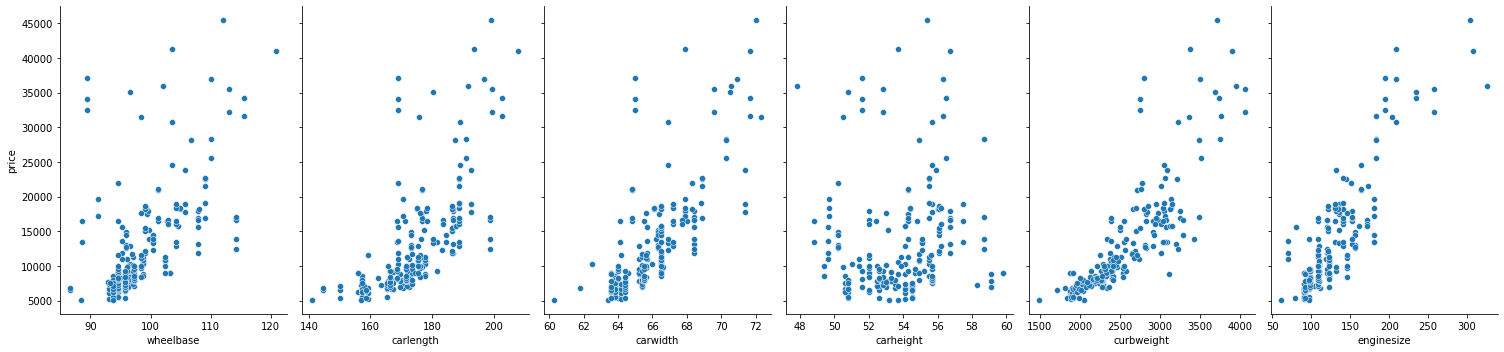

In [16]:


#Pretpostavka br. 2: Linearnost između nezavisne varijable X i zavisne varijable Y (proverava se preko tačkastog dijagrama)
sns.pairplot(df.head(205), x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize'], 
                          y_vars='price',height=5, aspect=0.7, kind='scatter')
plt.tight_layout()
plt.show()

        

<function matplotlib.pyplot.show>

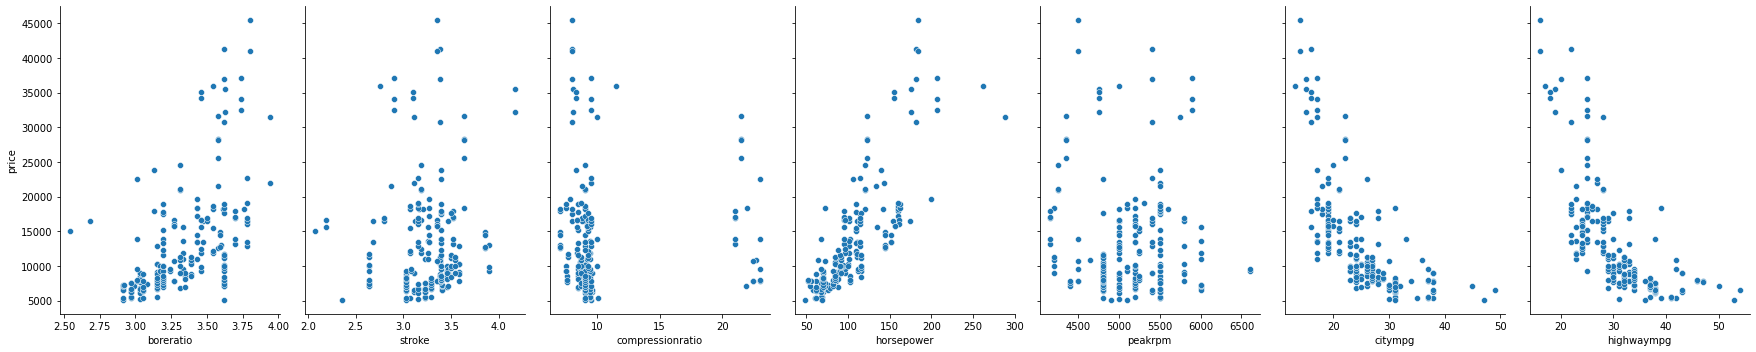

In [17]:

sns.pairplot(df.head(205), x_vars=['boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
                          y_vars='price',height=5, aspect=0.7, kind='scatter')
plt.tight_layout()
plt.show

In [18]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.drop(['car_ID','CarName', 'symboling','fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem'],axis = 1,inplace = True)
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


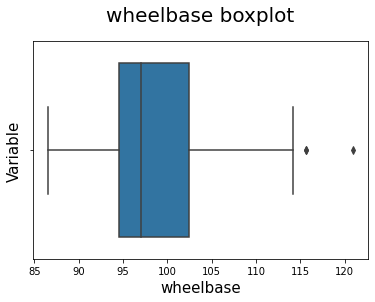

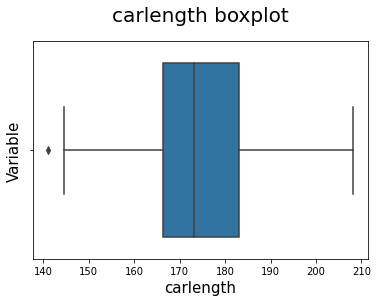

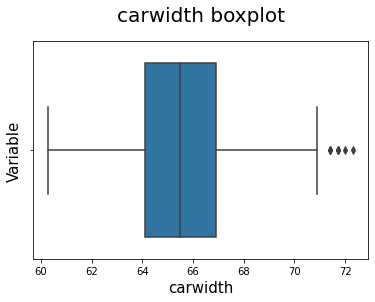

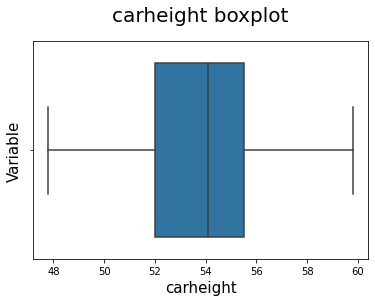

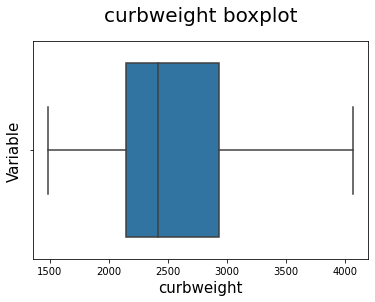

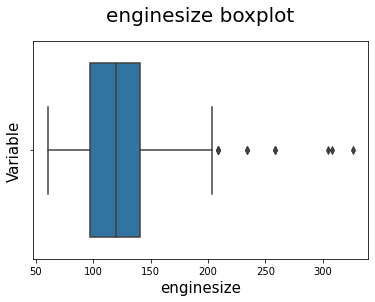

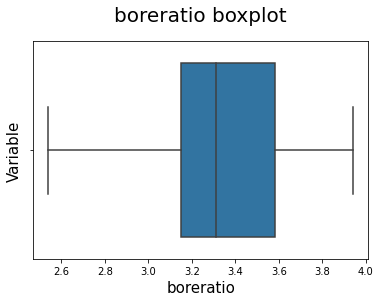

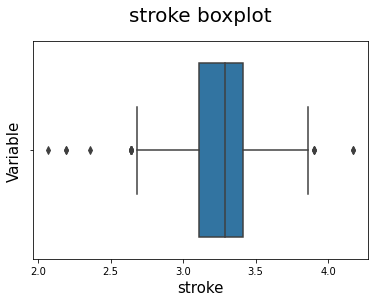

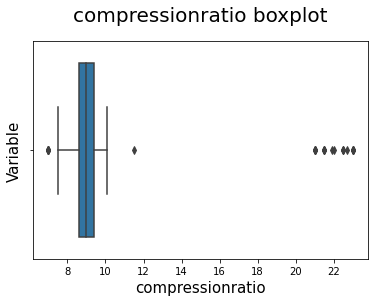

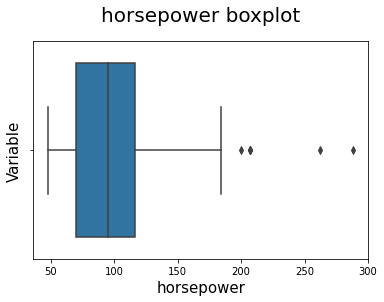

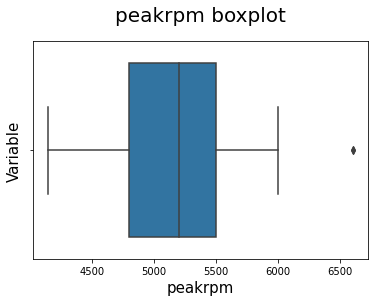

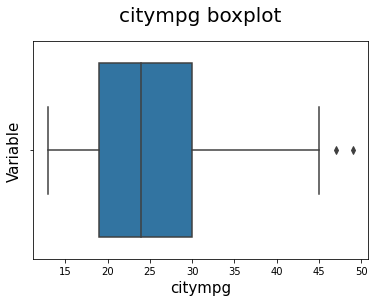

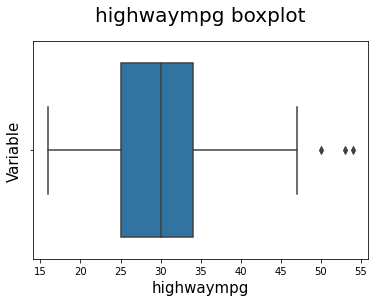

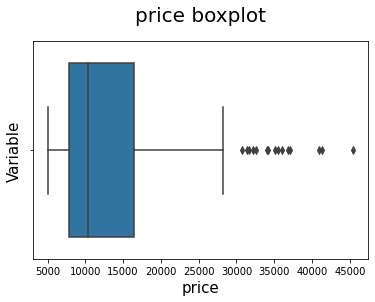

In [19]:


# Create all boxplots at once
num_variables=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
               'enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
               'highwaympg', 'price']

for column in num_variables:
  #Create the boxplot
  ax=sns.boxplot(x = df[column])

  #Add labels to the plot
  ax.set_xlabel(column, fontsize=15)
  ax.set_ylabel('Variable', fontsize=15)
  ax.set_title(column + ' boxplot', fontsize=20, pad=20)

  plt.show()

In [20]:

#Function for outliers detection
def outliers_detection(df_input, column):
    
    df_lower_quartile= df_input[column].quantile(0.25)
    df_uper_quartile= df_input[column].quantile(0.75)


    #Extract the inter quantile range
    df_iqr= df_uper_quartile - df_lower_quartile

    #Get the upper and lower bounds
    lower_bound_up= df_uper_quartile + 1.5*df_iqr
    upper_bound_up= df_uper_quartile + 3*df_iqr

    #Get the upper and lower bounds
    upper_bound_down= df_lower_quartile - 1.5*df_iqr
    lower_bound_down= df_lower_quartile - 3*df_iqr

    #Extract values outside the upper bound
    df_outliers_current= df_input[(df_input[column] > upper_bound_up) | (df_input[column] < lower_bound_down)]
    df_input = df_input[(df_input[column] <= upper_bound_up) & (df_input[column] >= lower_bound_down)]

    df_outliers_current['variable']=column
    return df_input, df_outliers_current

#%%
#Loop over the numerical variables
num_variables=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
               'enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
               'highwaympg', 'price']

df_cleaned=df
df_outliers = pd.DataFrame()

for column in num_variables:
    df_cleaned, df_outliers_temp = outliers_detection(df_cleaned, column)
    df_outliers = df_outliers.append(df_outliers_temp)

#%%
df_outliers



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,variable
49,102.0,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262,5000,13,17,36000.0,enginesize
73,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,8.0,184,4500,14,16,40960.0,enginesize
74,112.0,199.2,72.0,55.4,3715,304,3.80,3.35,8.0,184,4500,14,16,45400.0,enginesize
111,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24,15580.0,stroke
113,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.4,95,5000,19,24,16695.0,stroke
134,99.1,186.6,66.5,56.1,2707,121,2.54,2.07,9.3,110,5250,21,28,15040.0,stroke
63,98.8,177.8,66.5,55.5,2443,122,3.39,3.39,22.7,64,4650,36,42,10795.0,compressionratio
66,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39,18344.0,compressionratio
67,110.0,190.9,70.3,56.5,3515,183,3.58,3.64,21.5,123,4350,22,25,25552.0,compressionratio
68,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,21.5,123,4350,22,25,28248.0,compressionratio


In [21]:
#Ova linija je samo pokazan primer kako bi se izvršilo izbacivanje instanci i ona se ne pokreće!
#df= df.drop(labels=[49,63,66,67,68,69,70,73,74,90,108,110,111,112,113,114,116,129,134,158,159,174,182,184,187,192,203], axis=0)
#df.shape

In [22]:
#Mahalanobis-ovo odstojanje
import scipy as sp
from scipy.stats import chi2

df_md = df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio','stroke','compressionratio',
            'horsepower','citympg', 'highwaympg']]
#Mahalanobi's Distance
def mahalanobis_method(df_md):
    #M-Distance
    feature_mean = df_md.mean(axis=0)
    x_minus_mu= df_md-feature_mean
    
    #Covariance matrix
    cov = np.cov(df_md.values.T)    
    #Inverse covariance matrix                 
    inv_covmat=sp.linalg.inv(cov)

    #Product                 
    left_term=np.dot(x_minus_mu, inv_covmat)
    mahal= np.dot(left_term, x_minus_mu.T)
    md= np.sqrt(mahal.diagonal())

    #Flag as outlier
    outlier=dict()

    #Cut-off point
    C= np.sqrt(chi2.ppf((0.025), df_md.shape[1])) #degrees of freedom=number of independant variables
    for index, value in enumerate(md):
        if value < C:
            outlier[index]=value
        else:
            continue

    return outlier, md

#%%
mahalanobis_method(df_md)

({3: 2.057828993748908,
  37: 1.514275722828981,
  38: 1.4470221569183497,
  42: 1.986862507876833,
  51: 2.0647047832639216,
  52: 2.0557804023178754,
  53: 2.070964272469058,
  54: 1.9916713200148326,
  85: 1.9672270190539696,
  86: 1.9659797473200582,
  87: 1.9211464650133827,
  88: 1.9211464650133827,
  89: 2.038694308993488,
  91: 1.883497727635925,
  92: 1.784683549034632,
  93: 2.0834798034332582,
  94: 1.724699521073216,
  95: 1.3182813338563775,
  96: 1.6399216811336408,
  97: 2.051343595719787,
  98: 1.3025459440734133,
  99: 1.763593689902919,
  100: 1.8172745266274095,
  156: 1.592991331608599,
  157: 1.6237163197623832,
  161: 1.4439903234350284,
  162: 1.4202968858992155,
  163: 1.8133680639421788,
  164: 1.8394260560674442,
  170: 2.0543097688585124,
  175: 1.976032658483363,
  176: 1.9754618100397043,
  177: 1.8559986665328956,
  183: 2.0919935543750072,
  185: 2.0817699151968054,
  186: 1.9185740408103253,
  188: 1.9398391525574163,
  190: 2.0658465555406726},
 array([

In [23]:
#Correlation matrix
#Checking for normality
from scipy.stats import anderson

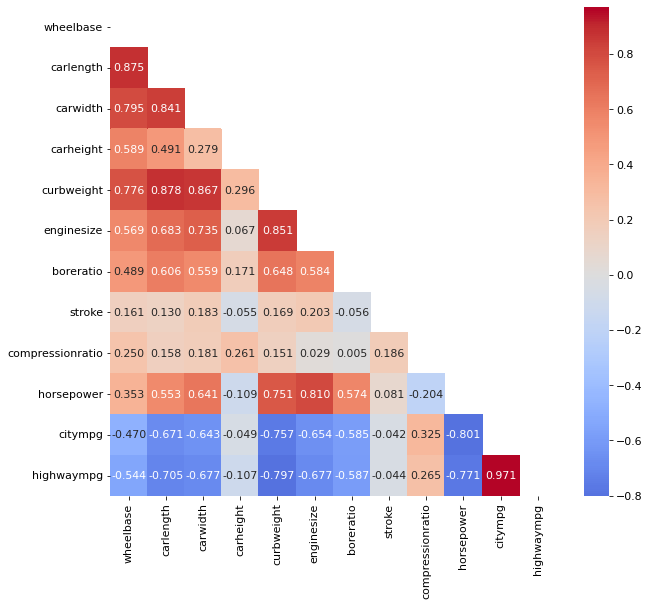

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matrica korelacije
#correlations = df.corr(method="pearson") #Komentar Zašto df?
correlations = df_md.corr(method="pearson")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":11}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

In [25]:


# Funcstion for normality check of numerical features
def normality_check(column):
  data = df[column]
  result= anderson(data)
  print("Normality check for feature: " + column)
  print('Statistic:%5f'% result.statistic)
  p=0
  for i in range(len(result.critical_values)):
      sl,cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
          print('%5f: %5f, data looks normal (fail to reject H0)' %(sl, cv))
      else:
          print('%5f: %5f, data does not look normal ( reject H0)' %(sl, cv))
  print("")

columns = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio','stroke','compressionratio',
            'horsepower','citympg', 'highwaympg']
for column in columns:
  normality_check(column)

Normality check for feature: wheelbase
Statistic:6.921693
15.000000: 0.565000, data does not look normal ( reject H0)
10.000000: 0.644000, data does not look normal ( reject H0)
5.000000: 0.772000, data does not look normal ( reject H0)
2.500000: 0.901000, data does not look normal ( reject H0)
1.000000: 1.072000, data does not look normal ( reject H0)

Normality check for feature: carlength
Statistic:1.532218
15.000000: 0.565000, data does not look normal ( reject H0)
10.000000: 0.644000, data does not look normal ( reject H0)
5.000000: 0.772000, data does not look normal ( reject H0)
2.500000: 0.901000, data does not look normal ( reject H0)
1.000000: 1.072000, data does not look normal ( reject H0)

Normality check for feature: carwidth
Statistic:5.026284
15.000000: 0.565000, data does not look normal ( reject H0)
10.000000: 0.644000, data does not look normal ( reject H0)
5.000000: 0.772000, data does not look normal ( reject H0)
2.500000: 0.901000, data does not look normal ( reje

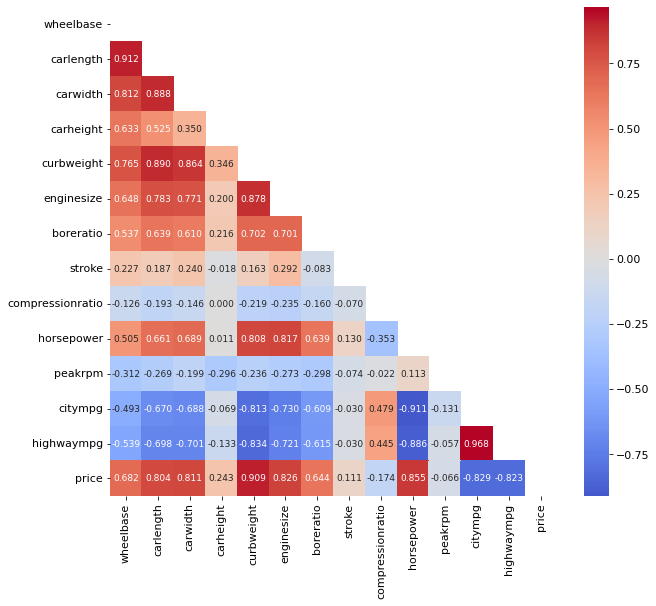

In [26]:
# Matrica korelacije
correlations = df.corr(method="spearman") 
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":9}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

In [27]:
df_2=df[['carlength','carwidth','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm',
         'citympg','highwaympg','price']]

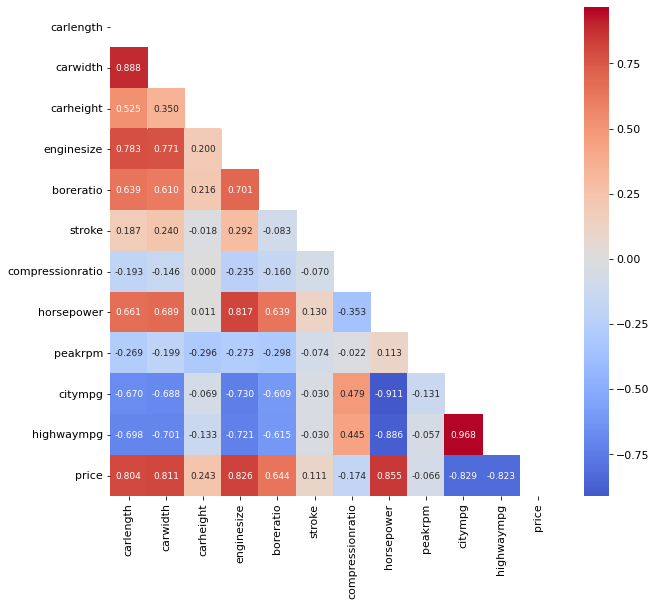

In [28]:

# Matrica korelacije
correlations = df_2.corr(method="spearman")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":9}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

In [29]:
df_3=df[['carwidth','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg',
         'highwaympg','price']]

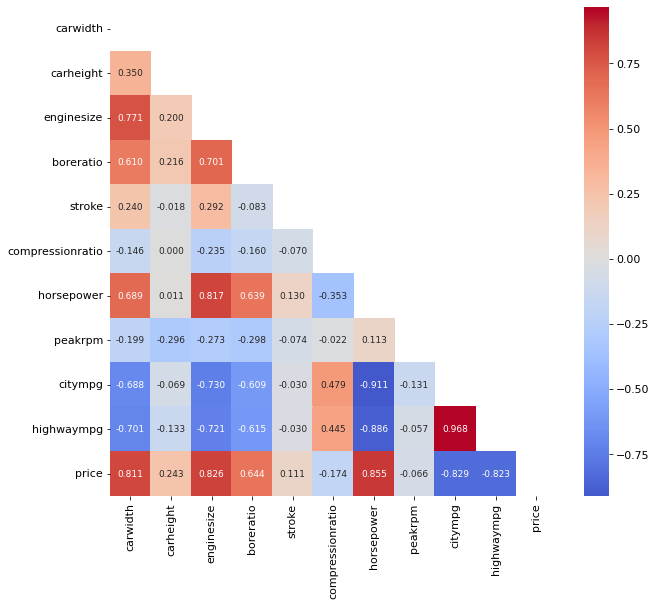

In [30]:

# Matrica korelacije
correlations = df_3.corr(method="spearman")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":9}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

In [31]:
df_4=df[['carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

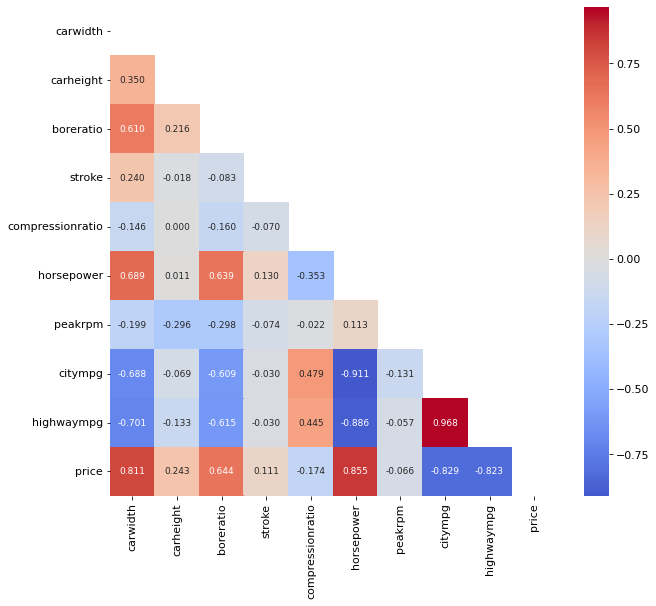

In [32]:

# Matrica korelacije
correlations = df_4.corr(method="spearman")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":9}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

In [33]:
df_5=df[['carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','highwaympg','price']]

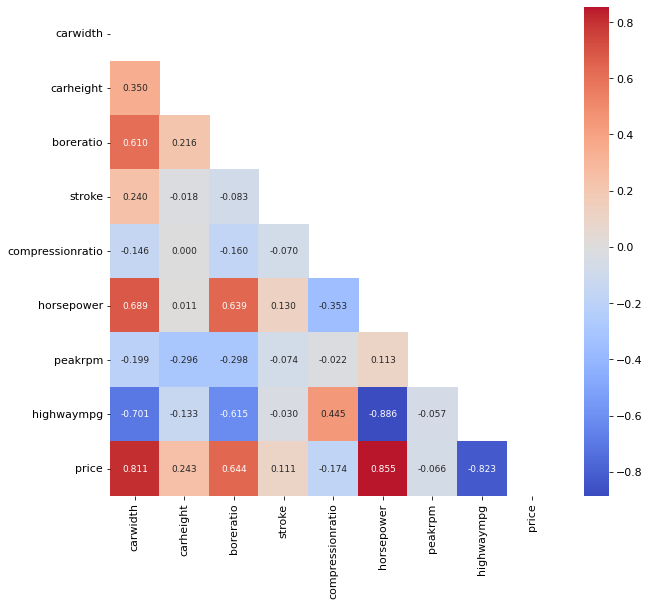

In [34]:
# Matrica korelacije
correlations = df_5.corr(method="spearman")
params = {'axes.titlesize':'9',
          'xtick.labelsize':'11',
          'ytick.labelsize':'11'}
matplotlib.rcParams.update(params)
fig, ax = plt.subplots(figsize=(10,9))
mask = np.zeros(correlations.shape)
upper_triangle_indices = np.triu_indices_from(mask)
mask[upper_triangle_indices] = True
sns.heatmap(correlations, fmt= ".3f", annot=True, annot_kws={"size":9}, cmap= 'coolwarm', center=0, mask = mask)
plt.yticks(rotation=0)
plt.show()

In [35]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math

In [36]:
X = df[['carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','highwaympg']]
y = df['price']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [39]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred_lr = lr.predict(X_test)

In [41]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_lr))

Root Mean Squared Error:  4543.669906942536
Mean Absolute Error:  3320.1441625389252


In [42]:
from sklearn.metrics import r2_score
print("R2_sccore =",r2_score(y_test, y_pred_lr))

R2_sccore = 0.7020261040503172


In [43]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: 13113.63665934598
slope: [ 2487.04968768   -71.52551316  -256.14597777  -422.52429333
   883.84940875  3871.7603585   -455.58333273 -1680.73948758]


## Model2

In [44]:
X = df[['carwidth','boreratio','horsepower','highwaympg']]
y = df['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_lr_2 = lr.predict(X_test)

In [48]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_2)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_lr_2))

Root Mean Squared Error:  4763.548937886582
Mean Absolute Error:  3570.367368870061


In [49]:
from sklearn.metrics import r2_score
print("R2_sccore =",r2_score(y_test, y_pred_lr_2))

R2_sccore = 0.6724889659334129


In [50]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: -84131.86938242314
slope: [1400.38617357  225.26702844   89.52281559 -167.53549817]


### Polinomijalna regresija

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import math

In [52]:
X = df[['carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','highwaympg']]
y = df['price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [54]:

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train) #Komentar: Šta radi ova linija code-a?
poly_features = pd.DataFrame(X_poly)
poly_features

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,66.5,53.9,3.31,3.54,8.7,92.0,4200.0,32.0,4422.25,...,75.69,800.4,36540.0,278.4,8464.0,386400.0,2944.0,17640000.0,134400.0,1024.0
1,1.0,68.0,54.8,3.78,3.12,8.0,175.0,5000.0,24.0,4624.00,...,64.00,1400.0,40000.0,192.0,30625.0,875000.0,4200.0,25000000.0,120000.0,576.0
2,1.0,66.5,54.9,3.27,3.35,22.5,73.0,4500.0,33.0,4422.25,...,506.25,1642.5,101250.0,742.5,5329.0,328500.0,2409.0,20250000.0,148500.0,1089.0
3,1.0,63.9,50.8,2.91,3.41,9.2,76.0,6000.0,38.0,4083.21,...,84.64,699.2,55200.0,349.6,5776.0,456000.0,2888.0,36000000.0,228000.0,1444.0
4,1.0,64.8,54.3,3.31,3.19,9.0,121.0,4250.0,28.0,4199.04,...,81.00,1089.0,38250.0,252.0,14641.0,514250.0,3388.0,18062500.0,119000.0,784.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.0,67.9,49.7,3.43,3.27,9.0,160.0,5200.0,25.0,4610.41,...,81.00,1440.0,46800.0,225.0,25600.0,832000.0,4000.0,27040000.0,130000.0,625.0
139,1.0,66.9,55.7,3.31,3.19,9.0,121.0,4250.0,25.0,4475.61,...,81.00,1089.0,38250.0,225.0,14641.0,514250.0,3025.0,18062500.0,106250.0,625.0
140,1.0,63.8,54.5,3.15,3.29,9.4,69.0,5200.0,37.0,4070.44,...,88.36,648.6,48880.0,347.8,4761.0,358800.0,2553.0,27040000.0,192400.0,1369.0
141,1.0,67.7,52.0,3.27,3.35,9.3,161.0,5200.0,24.0,4583.29,...,86.49,1497.3,48360.0,223.2,25921.0,837200.0,3864.0,27040000.0,124800.0,576.0


In [55]:
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(poly.fit_transform(X_test))

In [57]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))


Root Mean Squared Error:  4347.458449593755
Mean Absolute Error:  2707.0479749893684


In [58]:
from sklearn.metrics import r2_score
print("R2_sccore =",r2_score( y_test,y_pred))

R2_sccore = 0.7272055353633824


In [59]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -35313634369.198784
slope: [ 3.53150435e+10 -6.04279413e+03 -4.05603550e+03 -3.25008539e+05
 -1.83280022e+05  1.71373937e+03  4.96326017e+02 -1.12230046e+02
 -3.66939871e+02  6.67319448e+01 -2.23002202e+01  1.00584611e+03
  1.49360045e+03  2.43172805e+02 -2.18174381e+01 -6.96825339e-01
 -1.96085384e+02  4.08173917e+01  9.12819897e+02  1.87199308e+02
 -2.46150728e+02 -1.33000175e+00 -6.21337130e-02  6.01492155e+00
  4.57906768e+03 -5.30498128e+01  8.68256930e+00  2.76118647e+02
  1.92989317e+01  1.73524390e+03  3.07244455e+03 -1.32134395e+03
  3.14999237e+01  1.06439459e+01  3.52608882e+02 -3.65771234e+01
  1.02756142e+01 -5.18135956e-01  9.07539677e+01 -6.55929972e-01
  3.81090815e-02 -2.38299695e+00  3.78077447e-03  7.57435680e-01
  1.94352921e+01]


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import math

In [61]:
X = df[['carwidth','boreratio','horsepower','highwaympg']]
y = df['price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [63]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

PolynomialFeatures()

In [64]:
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [65]:
y_pred_pr_2 = model.predict(poly.fit_transform(X_test))

In [66]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_pr_2)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_pr_2))

Root Mean Squared Error:  3659.438514998329
Mean Absolute Error:  2361.971349633755


In [67]:
from sklearn.metrics import r2_score



print("R2_sccore =",r2_score( y_test,y_pred_pr_2,))

R2_sccore = 0.8067170332841312


## Random forest

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.ensemble import RandomForestRegressor

In [69]:
X=df[['carwidth','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','highwaympg']]
y=df['price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [71]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)

In [72]:
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [73]:
y_pred_rf = regr.predict(X_test)

In [74]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_rf))
print("R2 ",r2_score(y_test,y_pred_rf))

Root Mean Squared Error:  2893.6738309132597
Mean Absolute Error:  1730.8214585253459
R2  0.8791452213681354


In [75]:
#Komentar: Uticajnost promenljivih
importance=regr.feature_importances_
importance

array([0.18599287, 0.01120884, 0.02677954, 0.01504134, 0.01134785,
       0.34270217, 0.01976156, 0.38716582])

## Model2

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.ensemble import RandomForestRegressor

In [77]:
X=df[['carwidth','boreratio','horsepower','highwaympg']]
y=df['price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [79]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)

In [80]:
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [81]:
y_pred_rf_2 = regr.predict(X_test)

In [82]:
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_2)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_rf_2))
print("R2 ",r2_score(y_test,y_pred_rf_2))

Root Mean Squared Error:  2966.3787975550526
Mean Absolute Error:  1794.5073478448076
R2  0.872995856397103


In [83]:
#Komentar: Uticajnost promenljivih
importance=regr.feature_importances_
importance

array([0.20466407, 0.04031164, 0.35688523, 0.39813906])